In [9]:
import numpy as np
import json
import csv
import pandas as pd
import re
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

In [75]:
year_list = [str(year) for year in range(1978,2019)]

In [76]:
data = []
with open('../nominate_movie_meta_data.json', 'r', encoding = 'utf-8') as f:
    json_dict = json.load(f)
    for year in year_list:
        data += json_dict[year]
        
data = pd.DataFrame(data)

def dict2list_other_nominate(series):
    l = []
    other_nominates = series['other_nominates']
    for each in other_nominates:
        if each['prized'] == 1:
            l.append(each['award'])
    return pd.Series([l])

data['other_nominates'] = data.apply(dict2list_other_nominate, axis = 'columns')

mlb = MultiLabelBinarizer()
onehot = mlb.fit_transform(data['other_nominates'])
columns = mlb.classes_
nomination_onehot = pd.DataFrame(onehot, columns = columns) #####################

onehot = mlb.fit_transform(data['performers'])
columns = mlb.classes_
performers_onehot = pd.DataFrame(onehot, columns = columns) #####################



In [77]:
performers = []
for element in data['performers'].values.tolist():
    performers += element

count = Counter(performers)
countSeries = pd.Series(count)

In [81]:
temp = countSeries.sort_values(ascending= False)

In [93]:
temp.value_counts().sort_index(ascending = False)

22       1
20       1
18       2
17       1
16       5
15       1
14       1
13       5
12       2
11       6
10      10
9       14
8       15
7       15
6       41
5       52
4       90
3      156
2      475
1     2065
dtype: int64

C:\Users\Rofan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


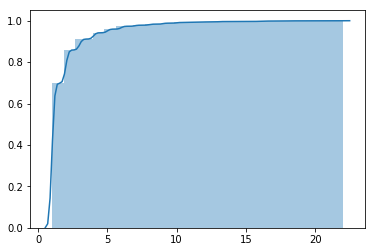

In [105]:
import seaborn as sns
sns.distplot(temp, hist_kws = dict(cumulative = True) , kde_kws = dict(cumulative = True))